# What is the best CNN architecture    
There are so many choices for CNN architecture. How do we choose the best one? First we must define what best means. The best may be the simplest, or it may be the most efficient at producing accuracy while minimizing computational complexity. In this kernel, we will run experiments to find the most accurate and efficient CNN architecture for classifying MNIST handwritten digits.


# Loading Data

Here I'm using mnist original dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)

# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

Using TensorFlow backend.


Exception: URL fetch failure on https://s3.amazonaws.com/img-datasets/mnist.npz : None -- [Errno -3] Temporary failure in name resolution

# visualization

NameError: name 'X_train' is not defined

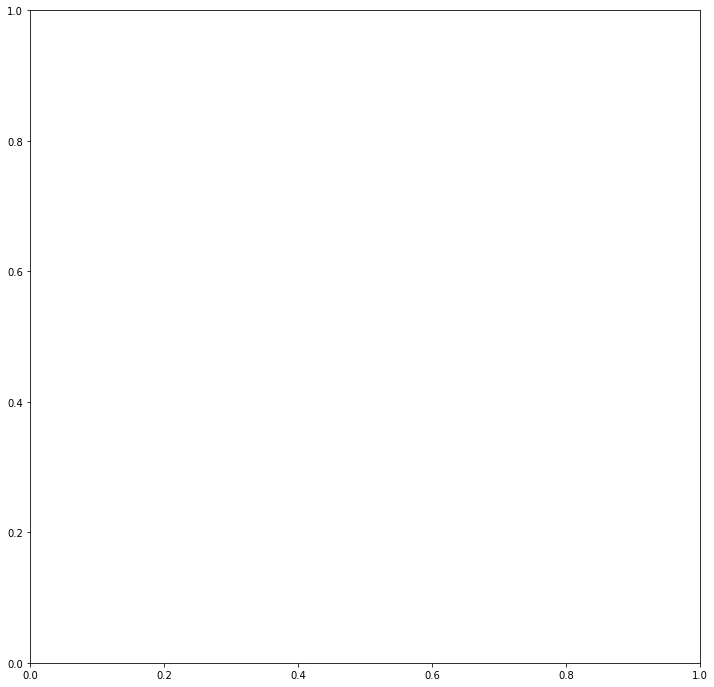

In [2]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[1].reshape(28,28), ax)

In [3]:
import seaborn as sns

g = sns.countplot(y_train)

NameError: name 'y_train' is not defined

# Different layers

The CNN can isolate features that are useful everywhere from these transformed images (feature maps).

# 1. **convolutional (Conv2D) layer**:    
It is like a set of learnable filters. Each filter transforms a part of the image (defined by the kernel size) using the kernel filter. The kernel filter matrix is applied on the whole image. Filters can be seen as a transformation of the image.

![](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/35_blog_image_12.png)

## Conv2D class: 

![](https://raw.githubusercontent.com/soham1024/learn-cnn/master/Screenshot%20from%202020-05-09%2012-34-21.png)

This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. If use_bias is True, a bias vector is created and added to the outputs. Finally, if activation is not None, it is applied to the outputs as well.                     
                         
When using this layer as the first layer in a model, provide the keyword argument input_shape (tuple of integers, does not include the sample axis), e.g. input_shape=(128, 128, 3) for 128x128 RGB pictures in data_format="channels_last".

![](https://raw.githubusercontent.com/soham1024/learn-cnn/master/Screenshot%20from%202020-05-09%2013-12-22.png)

### Arguments:                     

*     filters: Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).
*     kernel_size: An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions.
*     strides: An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width. Can be a single integer to specify the same value for all spatial dimensions. Specifying any stride value != 1 is incompatible with specifying any dilation_rate value != 1.
*     padding: one of "valid" or "same" (case-insensitive).
*     data_format: A string, one of channels_last (default) or channels_first. The ordering of the dimensions in the inputs. channels_last corresponds to inputs with shape (batch_size, height, width, channels) while channels_first corresponds to inputs with shape (batch_size, channels, height, width). It defaults to the image_data_format value found in your Keras config file at ~/.keras/keras.json. If you never set it, then it will be "channels_last".
*     dilation_rate: an integer or tuple/list of 2 integers, specifying the dilation rate to use for dilated convolution. Can be a single integer to specify the same value for all spatial dimensions. Currently, specifying any dilation_rate value != 1 is incompatible with specifying any stride value != 1.
*     activation: Activation function to use. If you don't specify anything, no activation is applied ( see keras.activations).
*    use_bias: Boolean, whether the layer uses a bias vector.
*    kernel_initializer: Initializer for the kernel weights matrix ( see keras.initializers).
*    bias_initializer: Initializer for the bias vector ( see keras.initializers).
*    kernel_regularizer: Regularizer function applied to the kernel weights matrix (see keras.regularizers).
*    bias_regularizer: Regularizer function applied to the bias vector ( see keras.regularizers).
*    activity_regularizer: Regularizer function applied to the output of the layer (its "activation") ( see keras.regularizers).
*    kernel_constraint: Constraint function applied to the kernel matrix ( see keras.constraints).
*    bias_constraint: Constraint function applied to the bias vector ( see keras.constraints).

**Input shape**

*    4D tensor with shape: (batch_size, channels, rows, cols) if data_format='channels_first' or 4D tensor with shape: (batch_size, rows, cols, channels) if data_format='channels_last'.

**Output shape**

*    4D tensor with shape: (batch_size, filters, new_rows, new_cols) if data_format='channels_first' or 4D tensor with shape: (batch_size, new_rows, new_cols, filters) if data_format='channels_last'. rows and cols values might have changed due to padding.

**Returns**

*    A tensor of rank 4 representing activation(conv2d(inputs, kernel) + bias).

**Raises**

*    ValueError: if padding is "causal".
*    ValueError: when both strides > 1 and dilation_rate > 1.


# 2. **pooling (MaxPool2D) layer**:         
This layer simply acts as a downsampling filter. It looks at the 2 neighboring pixels and picks the maximal value. These are used to reduce computational cost, and to some extent also reduce overfitting. We have to choose the pooling size (i.e the area size pooled each time) more the pooling dimension is high, more the downsampling is important.

![](https://qph.fs.quoracdn.net/main-qimg-40cdeb3b43594f4b1b1b6e2c137e80b7.webp)

Combining convolutional and pooling layers, CNN are able to combine local features and learn more global features of the image.

![](https://raw.githubusercontent.com/soham1024/learn-cnn/master/Screenshot%20from%202020-05-09%2013-07-34.png)

Max pooling operation for 2D spatial data.                 
                        
Downsamples the input representation by taking the maximum value over the window defined by pool_size for each dimension along the features axis. The window is shifted by strides in each dimension. The resulting output when using "valid" padding option has a shape(number of rows or columns) of: output_shape = (input_shape - pool_size + 1) / strides)                        
                                   
The resulting output shape when using the "same" padding option is: output_shape = input_shape / strides

![](https://raw.githubusercontent.com/soham1024/learn-cnn/master/Screenshot%20from%202020-05-09%2013-08-21.png)

![](https://raw.githubusercontent.com/soham1024/learn-cnn/master/Screenshot%20from%202020-05-09%2014-30-54.png)

![](https://raw.githubusercontent.com/soham1024/learn-cnn/master/Screenshot%20from%202020-05-09%2014-32-24.png)

![](https://raw.githubusercontent.com/soham1024/learn-cnn/master/Screenshot%20from%202020-05-09%2014-34-12.png)

### Arguments

*    pool_size: integer or tuple of 2 integers, window size over which to take the maximum. (2, 2) will take the max value over a 2x2 pooling window. If only one integer is specified, the same window length will be used for both dimensions.
*    strides: Integer, tuple of 2 integers, or None. Strides values. Specifies how far the pooling window moves for each pooling step. If None, it will default to pool_size.
*    padding: One of "valid" or "same" (case-insensitive). "valid" adds no zero padding. "same" adds padding such that if the stride is 1, the output shape is the same as input shape.
*    data_format: A string, one of channels_last (default) or channels_first. The ordering of the dimensions in the inputs. channels_last corresponds to inputs with shape (batch, height, width, channels) while channels_first corresponds to inputs with shape (batch, channels, height, width). It defaults to the image_data_format value found in your Keras config file at ~/.keras/keras.json. If you never set it, then it will be "channels_last".

**Input shape**

*    If data_format='channels_last': 4D tensor with shape (batch_size, rows, cols, channels).
*    If data_format='channels_first': 4D tensor with shape (batch_size, channels, rows, cols).

**Output shape**

*    If data_format='channels_last': 4D tensor with shape (batch_size, pooled_rows, pooled_cols, channels).
*    If data_format='channels_first': 4D tensor with shape (batch_size, channels, pooled_rows, pooled_cols).

**Returns**

*    A tensor of rank 4 representing the maximum pooled values. See above for output shape.

# 3. **Dropout**:      
It is a regularization method, where a proportion of nodes in the layer are randomly ignored (setting their wieghts to zero) for each training sample. This drops randomly a propotion of the network and forces the network to learn features in a distributed way. This technique also improves generalization and reduces the overfitting.

![](https://www.oreilly.com/library/view/deep-learning-for/9781788295628/assets/d4d20bd7-192c-48e7-9da2-6d3ddc7929e7.png)

![](https://raw.githubusercontent.com/soham1024/learn-cnn/master/Screenshot%20from%202020-05-09%2014-39-46.png)

The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.

Note that the Dropout layer only applies when training is set to True such that no values are dropped during inference. When using model.fit, training will be appropriately set to True automatically, and in other contexts, you can set the kwarg explicitly to True when calling the layer.

(This is in contrast to setting trainable=False for a Dropout layer. trainable does not affect the layer's behavior, as Dropout does not have any variables/weights that can be frozen during training.)

![](https://raw.githubusercontent.com/soham1024/learn-cnn/master/Screenshot%20from%202020-05-09%2014-58-44.png)

### Arguments:

*    rate: Float between 0 and 1. Fraction of the input units to drop.
*    noise_shape: 1D integer tensor representing the shape of the binary dropout mask that will be multiplied with the input. For instance, if your inputs have shape (batch_size, timesteps, features) and you want the dropout mask to be the same for all timesteps, you can use noise_shape=(batch_size, 1, features).
 *   seed: A Python integer to use as random seed.

**Call arguments:**

    inputs: Input tensor (of any rank).
    training: Python boolean indicating whether the layer should behave in training mode (adding dropout) or in inference mode (doing nothing).


# **relu**:     
It is the rectifier (activation function max(0,x). The rectifier activation function is used to add non linearity to the network.

![](https://qph.fs.quoracdn.net/main-qimg-07bc0ec05532caf5ebe8b4c82d0f5ca3)

![](https://i.pinimg.com/originals/bd/31/d2/bd31d2c58e90916640168e31014595cf.png)

![](https://raw.githubusercontent.com/soham1024/learn-cnn/master/Screenshot%20from%202020-05-09%2015-15-06.png)

Rectified Linear Unit activation function.

With default values, it returns element-wise max(x, 0).

Otherwise, it follows:

![](https://raw.githubusercontent.com/soham1024/learn-cnn/master/Screenshot%20from%202020-05-09%2015-17-34.png)

### Arguments :

*    max_value: Float >= 0. Maximum activation value. Default to None, which means unlimited.
*    negative_slope: Float >= 0. Negative slope coefficient. Default to 0.
*    threshold: Float. Threshold value for thresholded activation. Default to 0.

**Input shape**

*    Arbitrary. Use the keyword argument input_shape (tuple of integers, does not include the batch axis) when using this layer as the first layer in a model.

**Output shape**

*    Same shape as the input.

# 4. Flatten layer:    
It is use to convert the final feature maps into a one single 1D vector. This flattening step is needed so that you can make use of fully connected layers after some convolutional/maxpool layers. It combines all the found local features of the previous convolutional layers.

![](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/73_blog_image_2.png)

Flattens the input. Does not affect the batch size.

Note: If inputs are shaped (batch,) without a feature axis, then flattening adds an extra channel dimension and output shape is (batch, 1).

![](https://raw.githubusercontent.com/soham1024/learn-cnn/master/Screenshot%20from%202020-05-09%2015-22-21.png)

![](https://raw.githubusercontent.com/soham1024/learn-cnn/master/Screenshot%20from%202020-05-09%2015-24-51.png)

### Arguments:

*    data_format: A string, one of channels_last (default) or channels_first. The ordering of the dimensions in the inputs. channels_last corresponds to inputs with shape (batch, ..., channels) while channels_first corresponds to inputs with shape (batch, channels, ...). It defaults to the image_data_format value found in your Keras config file at ~/.keras/keras.json. If you never set it, then it will be "channels_last".


# 5. Dense layer:        
It is just artificial neural networks (ANN) classifier.

![](https://deeplizard.com/images/deep%20neural%20network%20with%204%20layers.png)

![](https://raw.githubusercontent.com/soham1024/learn-cnn/master/Screenshot%20from%202020-05-09%2015-27-03.png)

Just your regular densely-connected NN layer.

Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).

Note: If the input to the layer has a rank greater than 2, then Dense computes the dot product between the inputs and the kernel along the last axis of the inputs and axis 1 of the kernel (using tf.tensordot). For example, if input has dimensions (batch_size, d0, d1), then we create a kernel with shape (d1, units), and the kernel operates along axis 2 of the input, on every sub-tensor of shape (1, 1, d1) (there are batch_size * d0 such sub-tensors). The output in this case will have shape (batch_size, d0, units).

Besides, layer attributes cannot be modified after the layer has been called once (except the trainable attribute).

![](https://raw.githubusercontent.com/soham1024/learn-cnn/master/Screenshot%20from%202020-05-09%2015-29-12.png)

### Arguments: 

*    units: Positive integer, dimensionality of the output space.
*    activation: Activation function to use. If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x).
*    use_bias: Boolean, whether the layer uses a bias vector.
*    kernel_initializer: Initializer for the kernel weights matrix.
*    bias_initializer: Initializer for the bias vector.
*    kernel_regularizer: Regularizer function applied to the kernel weights matrix.
*    bias_regularizer: Regularizer function applied to the bias vector.
*    activity_regularizer: Regularizer function applied to the output of the layer (its "activation").
*    kernel_constraint: Constraint function applied to the kernel weights matrix.
*    bias_constraint: Constraint function applied to the bias vector.

**Input shape**

*    N-D tensor with shape: (batch_size, ..., input_dim). The most common situation would be a 2D input with shape (batch_size, input_dim).

**Output shape**

*    N-D tensor with shape: (batch_size, ..., units). For instance, for a 2D input with shape (batch_size, input_dim), the output would have shape (batch_size, units).

####################################################################################################################

**I've used the Keras Sequential API, where you just have to add one layer at a time, starting from the input.**

In the last layer(Dense(X,activation="softmax")) the net outputs distribution of probability of each class.

![](https://miro.medium.com/max/3600/1*dOv2a1ctNrHDo8Zks30Bbw.png)

In [4]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [5]:
#load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Exception: URL fetch failure on https://s3.amazonaws.com/img-datasets/mnist.npz : None -- [Errno -3] Temporary failure in name resolution

# Flatten

In [6]:
#flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

NameError: name 'X_train' is not defined

# Normalize

In [7]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

NameError: name 'X_train' is not defined

# One Hot Encode

In [8]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

NameError: name 'y_train' is not defined

# Baseline Model

In [9]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [10]:
# build the model
model = baseline_model()
model.summary()

NameError: name 'num_pixels' is not defined

In [11]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

NameError: name 'model' is not defined

# Simple CNN

In [12]:
# Simple CNN for the MNIST Dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# define a simple CNN model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
	model.add(MaxPooling2D())
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# build the model
model_simple = baseline_model()
model_simple.summary()

Exception: URL fetch failure on https://s3.amazonaws.com/img-datasets/mnist.npz : None -- [Errno -3] Temporary failure in name resolution

In [13]:
# Fit the model
model_simple.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

# Final evaluation of the model
scores = model_simple.evaluate(X_test, y_test, verbose=1)

print("CNN Error: %.2f%%" % (100-scores[1]*100))

NameError: name 'model_simple' is not defined

# Large CNN

In [14]:
# Large CNN for the MNIST Dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# define the larger model
def large_model():
	# create model
	model = Sequential()
	model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
	model.add(MaxPooling2D())
	model.add(Conv2D(15, (3, 3), activation='relu'))
	model.add(MaxPooling2D())
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# build the model
model_large = large_model()
model_large.summary()

Exception: URL fetch failure on https://s3.amazonaws.com/img-datasets/mnist.npz : None -- [Errno -3] Temporary failure in name resolution

In [15]:
# Fit the model
model_large.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model

scores = model_large.evaluate(X_test, y_test, verbose=1)

print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

NameError: name 'model_large' is not defined

# Larger CNN

In [16]:
# Larger CNN for the MNIST Dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# define the larger model
def larger_model():
    # create model
    model = Sequential()
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.1))
    model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=192, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.1))
    model.add(Conv2D(filters=192, kernel_size=5, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2, padding='same'))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# build the model
model_larger = larger_model()
model_larger.summary()

Exception: URL fetch failure on https://s3.amazonaws.com/img-datasets/mnist.npz : None -- [Errno -3] Temporary failure in name resolution

In [17]:
# Fit the model
model_larger.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100)
# Final evaluation of the model

scores = model_larger.evaluate(X_test, y_test, verbose=1)

print("Larger CNN Error: %.2f%%" % (100-scores[1]*100))

NameError: name 'model_larger' is not defined

# Choosing final Model
From above all the cases as we can see the last model is having the best accuracy. 
Training convolutional neural networks is a random process. This makes experiments difficult because each time you run the same experiment, you get different results. Therefore, you must run your experiments dozens of times and take an average. 

In [18]:
import pandas as pd
X_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv').values.astype('float32')
X_test = X_test.reshape(-1, 28, 28, 1)
X_test = X_test.astype('float32')/255
testY = model_larger.predict_classes(X_test, verbose=1)

NameError: name 'model_larger' is not defined

In [19]:
sub = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')
sub['Label'] = testY
sub.to_csv('submission.csv',index=False)

NameError: name 'testY' is not defined

to know how to make neural network without using any deep learning tools(Like: Tensorflow, Pytorch,etc) got through my another notebook: [Create Neural Network From Scratch](https://www.kaggle.com/soham1024/create-neural-network-from-scratch)     

### how inside the Neural Network work is done: 

In [20]:
from IPython.display import YouTubeVideo
YouTubeVideo('3JQ3hYko51Y', width=800, height=450)

reference: 
* https://keras.io/

# **If you find this notebook helpful or you just liked it , some upvotes would be very much appreciated - That will keep me motivated :)**